# Predict House Prices

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

## Load Data

We are predicting for "SalePrice".

Houses sold in Ames, Iowa between 2006 and 2010.

In [3]:
# import csv for training data set
train = pd.read_csv('train.csv')

In [4]:
raw = train[:]

## Data Exploration

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1   60          RL       65.0         8450     Pave   NaN   Reg       
1  2   20          RL       80.0         9600     Pave   NaN   Reg       
2  3   60          RL       68.0         11250    Pave   NaN   IR1       
3  4   70          RL       60.0         9550     Pave   NaN   IR1       
4  5   60          RL       84.0         14260    Pave   NaN   IR1       

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0  Lvl         AllPub    Inside    Gtl       CollgCr      Norm        
1  Lvl         AllPub    FR2       Gtl       Veenker      Feedr       
2  Lvl         AllPub    Inside    Gtl       CollgCr      Norm        
3  Lvl         AllPub    Corner    Gtl       Crawfor      Norm        
4  Lvl         AllPub    FR2       Gtl       NoRidge      Norm        

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0  Norm       1Fam     2Story     7            5            2003        
1  Norm       1Fam     1Story     6            8            1976        
2  Norm       1Fam     2Story     7            5            2001        
3  Norm       1Fam     2Story     7            5            1915        
4  Norm       1Fam     2Story     8            5            2000        

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0  2003          Gable     CompShg  VinylSd     VinylSd     BrkFace     
1  1976          Gable     CompShg  MetalSd     MetalSd     None        
2  2002          Gable     CompShg  VinylSd     VinylSd     BrkFace     
3  1970          Gable     CompShg  Wd Sdng     Wd Shng     None        
4  2000          Gable     CompShg  VinylSd     VinylSd     BrkFace     

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0  196.0       Gd        TA        PConc      Gd       TA       No            
1  0.0         TA        TA        CBlock     Gd       TA       Gd            
2  162.0       Gd        TA        PConc      Gd       TA       Mn            
3  0.0         TA        TA        BrkTil     TA       Gd       No            
4  350.0       Gd        TA        PConc      Gd       TA       Av            

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0  GLQ          706         Unf          0           150        856           
1  ALQ          978         Unf          0           284        1262          
2  GLQ          486         Unf          0           434        920           
3  ALQ          216         Unf          0           540        756           
4  GLQ          655         Unf          0           490        1145          

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  GasA    Ex        Y          SBrkr      856       854       0              
1  GasA    Ex        Y          SBrkr      1262      0         0              
2  GasA    Ex        Y          SBrkr      920       866       0              
3  GasA    Gd        Y          SBrkr      961       756       0              
4  GasA    Ex        Y          SBrkr      1145      1053      0              

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0  1710       1             0             2         1         3              
1  1262       0             1             2         0         3              
2  1786       1             0             2         1         3              
3  1717       1             0             1         0         3              
4  2198       1             0             2         1         4              

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0  1             Gd          8             Typ        0           NaN          
1  1             TA          6             Typ        1           TA           
2  1             Gd          6             Typ        1           TA           
3  1             Gd          7         

In [4]:
train['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

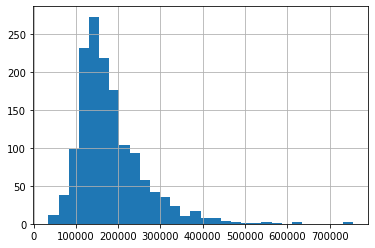

In [5]:
train['SalePrice'].hist(bins=30)

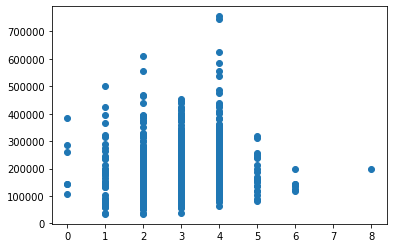

In [6]:
plt.scatter(train['BedroomAbvGr'],train['SalePrice'])

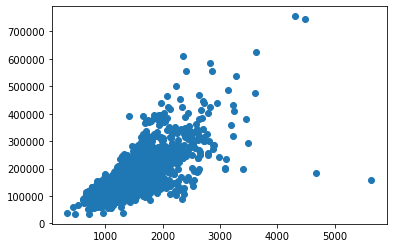

In [7]:
plt.scatter(train['GrLivArea'],train['SalePrice'])

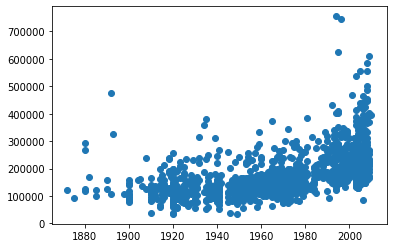

In [8]:
plt.scatter(train['YearBuilt'],train['SalePrice'])

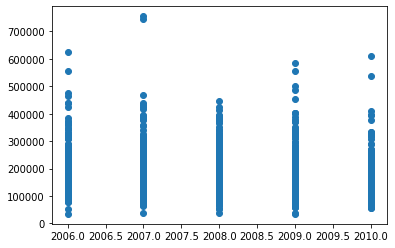

In [9]:
plt.scatter(train['YrSold'],train['SalePrice'])

In [10]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000  1460.000000    1460.000000   
mean   730.500000   56.897260    70.049958    10516.828082   6.099315      
std    421.610009   42.300571    24.284752    9981.264932    1.382997      
min    1.000000     20.000000    21.000000    1300.000000    1.000000      
25%    365.750000   20.000000    59.000000    7553.500000    5.000000      
50%    730.500000   50.000000    69.000000    9478.500000    6.000000      
75%    1095.250000  70.000000    80.000000    11601.500000   7.000000      
max    1460.000000  190.000000   313.000000   215245.000000  10.000000     

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000  1460.000000   1452.000000  1460.000000   
mean   5.575342     1971.267808  1984.865753   103.685262   443.639726    
std    1.112799     30.202904    20.645407     181.066207   456.098091    
min    1.000000     1872.000000  1950.000000   0.000000     0.000000      
25%    5.000000     1954.000000  1967.000000   0.000000     0.000000      
50%    5.000000     1973.000000  1994.000000   0.000000     383.500000    
75%    6.000000     2000.000000  2004.000000   166.000000   712.250000    
max    9.000000     2010.000000  2010.000000   1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   46.549315    567.240411   1057.429452  1162.626712  346.992466    
std    161.319273   441.866955   438.705324   386.587738   436.528436    
min    0.000000     0.000000     0.000000     334.000000   0.000000      
25%    0.000000     223.000000   795.750000   882.000000   0.000000      
50%    0.000000     477.500000   991.500000   1087.000000  0.000000      
75%    0.000000     808.000000   1298.250000  1391.250000  728.000000    
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean   5.844521      1515.463699  0.425342      0.057534      1.565068      
std    48.623081     525.480383   0.518911      0.238753      0.550916      
min    0.000000      334.000000   0.000000      0.000000      0.000000      
25%    0.000000      1129.500000  0.000000      0.000000      1.000000      
50%    0.000000      1464.000000  0.000000      0.000000      2.000000      
75%    0.000000      1776.750000  1.000000      0.000000      2.000000      
max    572.000000    5642.000000  3.000000      2.000000      3.000000      

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean   0.382877     2.866438      1.046575      6.517808      0.613014      
std    0.502885     0.815778      0.220338      1.625393      0.644666      
min    0.000000     0.000000      0.000000      2.000000      0.000000      
25%    0.000000     2.000000      1.000000      5.000000      0.000000      
50%    0.000000     3.000000      1.000000      6.000000      1.000000      
75%    1.000000     3.000000      1.000000      7.000000      1.000000      
max    2.000000     8.000000      3.000000      14.000000     3.000000      

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164  1.767123     472.980137   94.244521    46.660274     
std    24.689725    0.747315     213.804841   125.338794   66.256028     
min    1900.000000  0.000000     0.000000     0.000000     0.000000      
25%    1961.000000  1.000000     334.500000   0.000000     0.000000      
50%    1980.000000  2.000000     480.000000   0.000000     25.000000     
75%    2002.000000  2.000000     576.000000   168.000000   68.000000     
max    2

In [11]:
train[['Neighborhood','SalePrice']].groupby('Neighborhood').min().sort_values(by='SalePrice')

SalePrice
Neighborhood           
IDOTRR        34900    
OldTown       37900    
BrkSide       39300    
Edwards       58500    
SWISU         60000    
Sawyer        62383    
MeadowV       75000    
SawyerW       76000    
NWAmes        82500    
BrDale        83000    
Mitchel       84500    
NAmes         87500    
Crawfor       90350    
CollgCr       110000   
Blueste       124000   
NPkVill       127500   
ClearCr       130000   
Timber        137500   
Gilbert       141000   
Somerst       144152   
NridgHt       154000   
Blmngtn       159895   
Veenker       162500   
StoneBr       170000   
NoRidge       190000

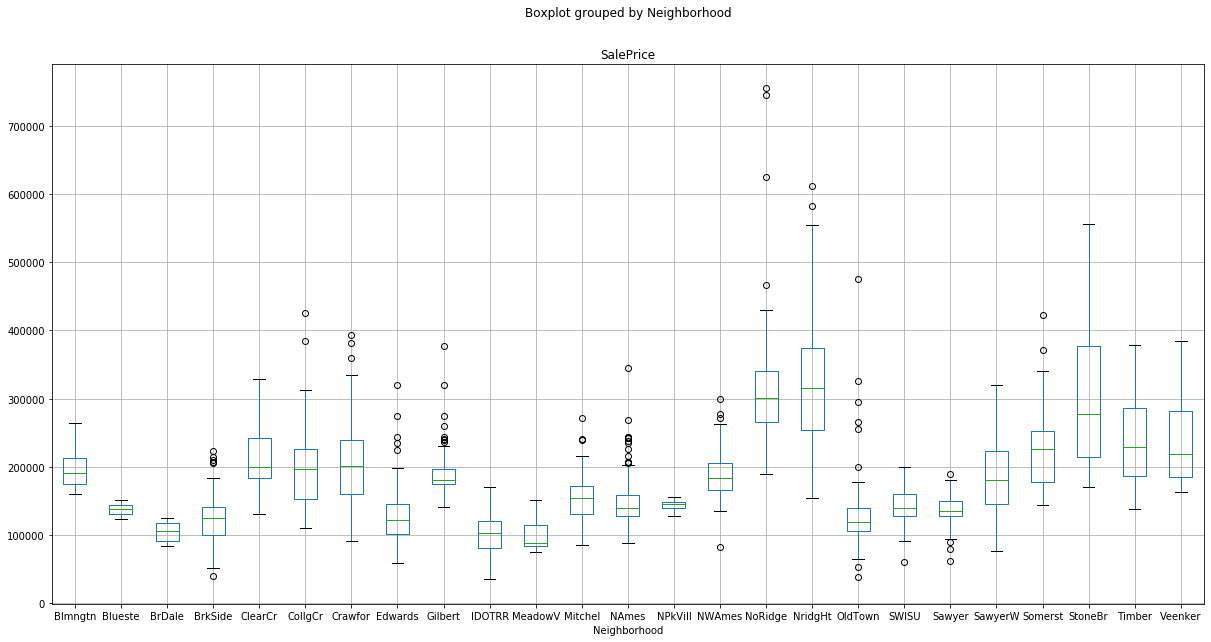

In [12]:
plt.rcParams["figure.figsize"] = (20,10)

train[['Neighborhood','SalePrice']].boxplot(column='SalePrice', by='Neighborhood')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [30]:
train[['Condition1','Condition2','BldgType','Foundation','OverallQual','OverallCond','Functional']].head(10)

Condition1 Condition2 BldgType Foundation  OverallQual  OverallCond  \
0  Norm       Norm       1Fam     PConc      7            5             
1  Feedr      Norm       1Fam     CBlock     6            8             
2  Norm       Norm       1Fam     PConc      7            5             
3  Norm       Norm       1Fam     BrkTil     7            5             
4  Norm       Norm       1Fam     PConc      8            5             
5  Norm       Norm       1Fam     Wood       5            5             
6  Norm       Norm       1Fam     PConc      8            5             
7  PosN       Norm       1Fam     CBlock     7            6             
8  Artery     Norm       1Fam     BrkTil     7            5             
9  Artery     Artery     2fmCon   BrkTil     5            6             

  Functional  
0  Typ        
1  Typ        
2  Typ        
3  Typ        
4  Typ        
5  Typ        
6  Typ        
7  Typ        
8  Min1       
9  Typ

## Assess Missing Data

In [5]:
# Create dataframe of count of non-NA values for each variable.
count_non_na = pd.DataFrame(train.count())

# Rename column.
count_non_na.rename(columns={0:"count"}, inplace=True)

# Add new column that calculates the percent of total rows that are populated by non-NA values.
total = train.shape[0]
count_non_na['pct_complete'] = count_non_na / total

In [14]:
count_non_na.sort_values('count')

count  pct_complete
PoolQC         7      0.004795    
MiscFeature    54     0.036986    
Alley          91     0.062329    
Fence          281    0.192466    
FireplaceQu    770    0.527397    
LotFrontage    1201   0.822603    
GarageYrBlt    1379   0.944521    
GarageType     1379   0.944521    
GarageFinish   1379   0.944521    
GarageQual     1379   0.944521    
GarageCond     1379   0.944521    
BsmtExposure   1422   0.973973    
BsmtFinType2   1422   0.973973    
BsmtFinType1   1423   0.974658    
BsmtCond       1423   0.974658    
BsmtQual       1423   0.974658    
MasVnrArea     1452   0.994521    
MasVnrType     1452   0.994521    
Electrical     1459   0.999315    
KitchenQual    1460   1.000000    
BedroomAbvGr   1460   1.000000    
HalfBath       1460   1.000000    
FullBath       1460   1.000000    
BsmtHalfBath   1460   1.000000    
TotRmsAbvGrd   1460   1.000000    
BsmtFullBath   1460   1.000000    
KitchenAbvGr   1460   1.000000    
Functional     1460   1.000000    
Id             1460   1.000000    
GrLivArea      1460   1.000000    
GarageCars     1460   1.000000    
GarageArea     1460   1.000000    
PavedDrive     1460   1.000000    
WoodDeckSF     1460   1.000000    
OpenPorchSF    1460   1.000000    
EnclosedPorch  1460   1.000000    
3SsnPorch      1460   1.000000    
ScreenPorch    1460   1.000000    
PoolArea       1460   1.000000    
MiscVal        1460   1.000000    
MoSold         1460   1.000000    
YrSold         1460   1.000000    
SaleType       1460   1.000000    
Fireplaces     1460   1.000000    
LowQualFinSF   1460   1.000000    
HeatingQC      1460   1.000000    
1stFlrSF       1460   1.000000    
HouseStyle     1460   1.000000    
BldgType       1460   1.000000    
Condition2     1460   1.000000    
Condition1     1460   1.000000    
Neighborhood   1460   1.000000    
LandSlope      1460   1.000000    
OverallQual    1460   1.000000    
LotConfig      1460   1.000000    
LandContour    1460   1.000000    
LotShape       1460   1.000000    
Street         1460   1.000000    
LotArea        1460   1.000000    
MSZoning       1460   1.000000    
MSSubClass     1460   1.000000    
Utilities      1460   1.000000    
2ndFlrSF       1460   1.000000    
OverallCond    1460   1.000000    
YearRemodAdd   1460   1.000000    
CentralAir     1460   1.000000    
SaleCondition  1460   1.000000    
Heating        1460   1.000000    
TotalBsmtSF    1460   1.000000    
BsmtUnfSF      1460   1.000000    
BsmtFinSF2     1460   1.000000    
YearBuilt      1460   1.000000    
BsmtFinSF1     1460   1.000000    
ExterCond      1460   1.000000    
ExterQual      1460   1.000000    
Exterior2nd    1460   1.000000    
Exterior1st    1460   1.000000    
RoofMatl       1460   1.000000    
RoofStyle      1460   1.000000    
Foundation     1460   1.000000    
SalePrice      1460   1.000000

In [6]:
# Drop features with less than 80% populated

train = train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'])

In [7]:
# re-check missing data
count_non_na = pd.DataFrame(train.count())

# Rename column.
count_non_na.rename(columns={0:"count"}, inplace=True)

# Add new column that calculates the percent of total rows that are populated by non-NA values.
total = train.shape[0]
count_non_na['pct_complete'] = count_non_na / total

count_non_na.sort_values('count')

count  pct_complete
LotFrontage    1201   0.822603    
GarageType     1379   0.944521    
GarageYrBlt    1379   0.944521    
GarageFinish   1379   0.944521    
GarageQual     1379   0.944521    
GarageCond     1379   0.944521    
BsmtFinType2   1422   0.973973    
BsmtExposure   1422   0.973973    
BsmtCond       1423   0.974658    
BsmtQual       1423   0.974658    
BsmtFinType1   1423   0.974658    
MasVnrType     1452   0.994521    
MasVnrArea     1452   0.994521    
Electrical     1459   0.999315    
FullBath       1460   1.000000    
BsmtHalfBath   1460   1.000000    
BsmtFullBath   1460   1.000000    
HalfBath       1460   1.000000    
BedroomAbvGr   1460   1.000000    
GrLivArea      1460   1.000000    
LowQualFinSF   1460   1.000000    
2ndFlrSF       1460   1.000000    
KitchenAbvGr   1460   1.000000    
Id             1460   1.000000    
TotRmsAbvGrd   1460   1.000000    
SaleType       1460   1.000000    
YrSold         1460   1.000000    
MoSold         1460   1.000000    
MiscVal        1460   1.000000    
PoolArea       1460   1.000000    
ScreenPorch    1460   1.000000    
3SsnPorch      1460   1.000000    
EnclosedPorch  1460   1.000000    
OpenPorchSF    1460   1.000000    
WoodDeckSF     1460   1.000000    
PavedDrive     1460   1.000000    
GarageArea     1460   1.000000    
GarageCars     1460   1.000000    
1stFlrSF       1460   1.000000    
Functional     1460   1.000000    
KitchenQual    1460   1.000000    
Fireplaces     1460   1.000000    
TotalBsmtSF    1460   1.000000    
HeatingQC      1460   1.000000    
MSSubClass     1460   1.000000    
MSZoning       1460   1.000000    
LotArea        1460   1.000000    
Street         1460   1.000000    
LotShape       1460   1.000000    
LandContour    1460   1.000000    
Utilities      1460   1.000000    
LotConfig      1460   1.000000    
LandSlope      1460   1.000000    
Neighborhood   1460   1.000000    
Condition1     1460   1.000000    
Condition2     1460   1.000000    
BldgType       1460   1.000000    
HouseStyle     1460   1.000000    
CentralAir     1460   1.000000    
OverallQual    1460   1.000000    
YearBuilt      1460   1.000000    
YearRemodAdd   1460   1.000000    
RoofStyle      1460   1.000000    
RoofMatl       1460   1.000000    
Exterior1st    1460   1.000000    
Exterior2nd    1460   1.000000    
ExterQual      1460   1.000000    
ExterCond      1460   1.000000    
Foundation     1460   1.000000    
BsmtFinSF1     1460   1.000000    
BsmtFinSF2     1460   1.000000    
BsmtUnfSF      1460   1.000000    
SaleCondition  1460   1.000000    
Heating        1460   1.000000    
OverallCond    1460   1.000000    
SalePrice      1460   1.000000

## Replace Missing Data

With Mode.

In [8]:
columns_non_na = count_non_na[count_non_na['pct_complete'] < 1].index.values

for column in columns_non_na:
    column_mode = train[column].mode()[0]
    train[column].fillna(value=column_mode, inplace=True)

In [9]:
count_non_na = pd.DataFrame(train.count())

# Rename column.
count_non_na.rename(columns={0:"count"}, inplace=True)

# Add new column that calculates the percent of total rows that are populated by non-NA values.
total = train.shape[0]
count_non_na['pct_complete'] = count_non_na / total

count_non_na.sort_values('count')

count  pct_complete
Id             1460   1.0         
Functional     1460   1.0         
TotRmsAbvGrd   1460   1.0         
KitchenQual    1460   1.0         
KitchenAbvGr   1460   1.0         
BedroomAbvGr   1460   1.0         
HalfBath       1460   1.0         
FullBath       1460   1.0         
BsmtHalfBath   1460   1.0         
BsmtFullBath   1460   1.0         
GrLivArea      1460   1.0         
LowQualFinSF   1460   1.0         
2ndFlrSF       1460   1.0         
1stFlrSF       1460   1.0         
Electrical     1460   1.0         
CentralAir     1460   1.0         
Fireplaces     1460   1.0         
HeatingQC      1460   1.0         
GarageType     1460   1.0         
GarageFinish   1460   1.0         
SaleType       1460   1.0         
YrSold         1460   1.0         
MoSold         1460   1.0         
MiscVal        1460   1.0         
PoolArea       1460   1.0         
ScreenPorch    1460   1.0         
3SsnPorch      1460   1.0         
EnclosedPorch  1460   1.0         
OpenPorchSF    1460   1.0         
WoodDeckSF     1460   1.0         
PavedDrive     1460   1.0         
GarageCond     1460   1.0         
GarageQual     1460   1.0         
GarageArea     1460   1.0         
GarageCars     1460   1.0         
GarageYrBlt    1460   1.0         
Heating        1460   1.0         
TotalBsmtSF    1460   1.0         
BsmtUnfSF      1460   1.0         
HouseStyle     1460   1.0         
BldgType       1460   1.0         
Condition2     1460   1.0         
Condition1     1460   1.0         
Neighborhood   1460   1.0         
LandSlope      1460   1.0         
LotConfig      1460   1.0         
Utilities      1460   1.0         
LandContour    1460   1.0         
LotShape       1460   1.0         
Street         1460   1.0         
LotArea        1460   1.0         
LotFrontage    1460   1.0         
MSZoning       1460   1.0         
MSSubClass     1460   1.0         
OverallQual    1460   1.0         
OverallCond    1460   1.0         
YearBuilt      1460   1.0         
YearRemodAdd   1460   1.0         
BsmtFinSF2     1460   1.0         
BsmtFinType2   1460   1.0         
BsmtFinSF1     1460   1.0         
BsmtFinType1   1460   1.0         
BsmtExposure   1460   1.0         
BsmtCond       1460   1.0         
BsmtQual       1460   1.0         
SaleCondition  1460   1.0         
Foundation     1460   1.0         
ExterQual      1460   1.0         
MasVnrArea     1460   1.0         
MasVnrType     1460   1.0         
Exterior2nd    1460   1.0         
Exterior1st    1460   1.0         
RoofMatl       1460   1.0         
RoofStyle      1460   1.0         
ExterCond      1460   1.0         
SalePrice      1460   1.0

## Feature Engineering

In [10]:
#numeric_variables = list(data_type[data_type['Data Type']=='numeric'].index.values)
#binary_variables = list(data_type[data_type['Data Type']=='binary'].index.values)
#categorical_variables = list(data_type[data_type['Data Type']=='string'].index.values)
#integer_variables = list(data_type[data_type['Data Type']=='integer'].index.values)

#train.dtypes['Id'] #[1] == 'int64' # 'float64'

numeric_columns = []
for column in train.columns:
    if (train.dtypes[column] == 'int64') | (train.dtypes[column] == 'float64'):
        numeric_columns.append(column)

numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [11]:
#numeric_columns = numeric_columns.remove(['YearBuilt','YearRemodAdd','MoSold','YrSold'])
numeric_columns.remove('YearBuilt')
numeric_columns.remove('YearRemodAdd')
numeric_columns.remove('MoSold')
numeric_columns.remove('YrSold')

In [21]:
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [13]:
target = train['SalePrice']
features = train[numeric_columns].drop(columns=['Id', 'SalePrice']) #train[['LotArea','GrLivArea','OverallQual','OverallCond']]

In [14]:
features.head(4)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0  60          65.0         8450     7            5            196.0        
1  20          80.0         9600     6            8            0.0          
2  60          68.0         11250    7            5            162.0        
3  70          60.0         9550     7            5            0.0          

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0  706         0           150        856          856       854        
1  978         0           284        1262         1262      0          
2  486         0           434        920          920       866        
3  216         0           540        756          961       756        

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  0             1710       1             0             2         1          
1  0             1262       0             1             2         0          
2  0             1786       1             0             2         1          
3  0             1717       1             0             1         0          

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0  3             1             8             0           2003.0        
1  3             1             6             1           1976.0        
2  3             1             6             1           2001.0        
3  3             1             7             1           1998.0        

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0  2           548         0           61           0              0           
1  2           460         298         0            0              0           
2  2           608         0           42           0              0           
3  3           642         0           35           272            0           

   ScreenPorch  PoolArea  MiscVal  
0  0            0         0        
1  0            0         0        
2  0            0         0        
3  0            0         0

### Categorical Data

In [15]:
# NOTE: MoSold, YrSold, YrBuilt, etc should be categorical, not "int"

# One-hot encode YrSold

yr_sold_dummies = pd.get_dummies(train['YrSold'], prefix='ys')
features = pd.concat([features, yr_sold_dummies], axis=1)

# One-hot encode MoSold

mo_sold_dummies = pd.get_dummies(train['MoSold'], prefix='ms')
features = pd.concat([features, mo_sold_dummies], axis=1)

In [16]:
# One-hot encode Neighborhood

neighborhood_dummies = pd.get_dummies(train['Neighborhood'], prefix='nbh')
features = pd.concat([features, neighborhood_dummies], axis=1)

In [17]:
# One-hot encode Building Type

building_dummies = pd.get_dummies(train['BldgType'], prefix='bdg')
features = pd.concat([features, building_dummies], axis=1)

In [18]:
features.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0  60          65.0         8450     7            5            196.0        
1  20          80.0         9600     6            8            0.0          
2  60          68.0         11250    7            5            162.0        
3  70          60.0         9550     7            5            0.0          
4  60          84.0         14260    8            5            350.0        

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0  706         0           150        856          856       854        
1  978         0           284        1262         1262      0          
2  486         0           434        920          920       866        
3  216         0           540        756          961       756        
4  655         0           490        1145         1145      1053       

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  0             1710       1             0             2         1          
1  0             1262       0             1             2         0          
2  0             1786       1             0             2         1          
3  0             1717       1             0             1         0          
4  0             2198       1             0             2         1          

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0  3             1             8             0           2003.0        
1  3             1             6             1           1976.0        
2  3             1             6             1           2001.0        
3  3             1             7             1           1998.0        
4  4             1             9             1           2000.0        

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0  2           548         0           61           0              0           
1  2           460         298         0            0              0           
2  2           608         0           42           0              0           
3  3           642         0           35           272            0           
4  3           836         192         84           0              0           

   ScreenPorch  PoolArea  MiscVal  ys_2006  ys_2007  ys_2008  ys_2009  \
0  0            0         0        0        0        1        0         
1  0            0         0        0        1        0        0         
2  0            0         0        0        0        1        0         
3  0            0         0        1        0        0        0         
4  0            0         0        0        0        1        0         

   ys_2010  ms_1  ms_2  ms_3  ms_4  ms_5  ms_6  ms_7  ms_8  ms_9  ms_10  \
0  0        0     1     0     0     0     0     0     0     0     0       
1  0        0     0     0     0     1     0     0     0     0     0       
2  0        0     0     0     0     0     0     0     0     1     0       
3  0        0     1     0     0     0     0     0     0     0     0       
4  0        0     0     0     0     0     0     0     0     0     0       

   ms_11  ms_12  nbh_Blmngtn  nbh_Blueste  nbh_BrDale  nbh_BrkSide  \
0  0      0      0            0            0           0             
1  0      0      0            0            0           0             
2  0      0      0            0            0           0             
3  0      0      0            0            0           0             
4  0      1      0            0            0           0             

   nbh_ClearCr  nbh_CollgCr  nbh_Crawfor  nbh_Edwards  nbh_Gilbert  \
0  0            1            0            0            0             
1  0            0            0            0            0             
2  0            1            0            0            0             
3  0            0            1            0            0             
4  0            0            0            0            0 

In [19]:
features.nunique()

MSSubClass       15  
LotFrontage      110 
LotArea          1073
OverallQual      10  
OverallCond      9   
MasVnrArea       327 
BsmtFinSF1       637 
BsmtFinSF2       144 
BsmtUnfSF        780 
TotalBsmtSF      721 
1stFlrSF         753 
2ndFlrSF         417 
LowQualFinSF     24  
GrLivArea        861 
BsmtFullBath     4   
BsmtHalfBath     3   
FullBath         4   
HalfBath         3   
BedroomAbvGr     8   
KitchenAbvGr     4   
TotRmsAbvGrd     12  
Fireplaces       4   
GarageYrBlt      97  
GarageCars       5   
GarageArea       441 
WoodDeckSF       274 
OpenPorchSF      202 
EnclosedPorch    120 
3SsnPorch        20  
ScreenPorch      76  
PoolArea         8   
MiscVal          21  
ys_2006          2   
ys_2007          2   
ys_2008          2   
ys_2009          2   
ys_2010          2   
ms_1             2   
ms_2             2   
ms_3             2   
ms_4             2   
ms_5             2   
ms_6             2   
ms_7             2   
ms_8             2   
ms_9      

## Feature Selection

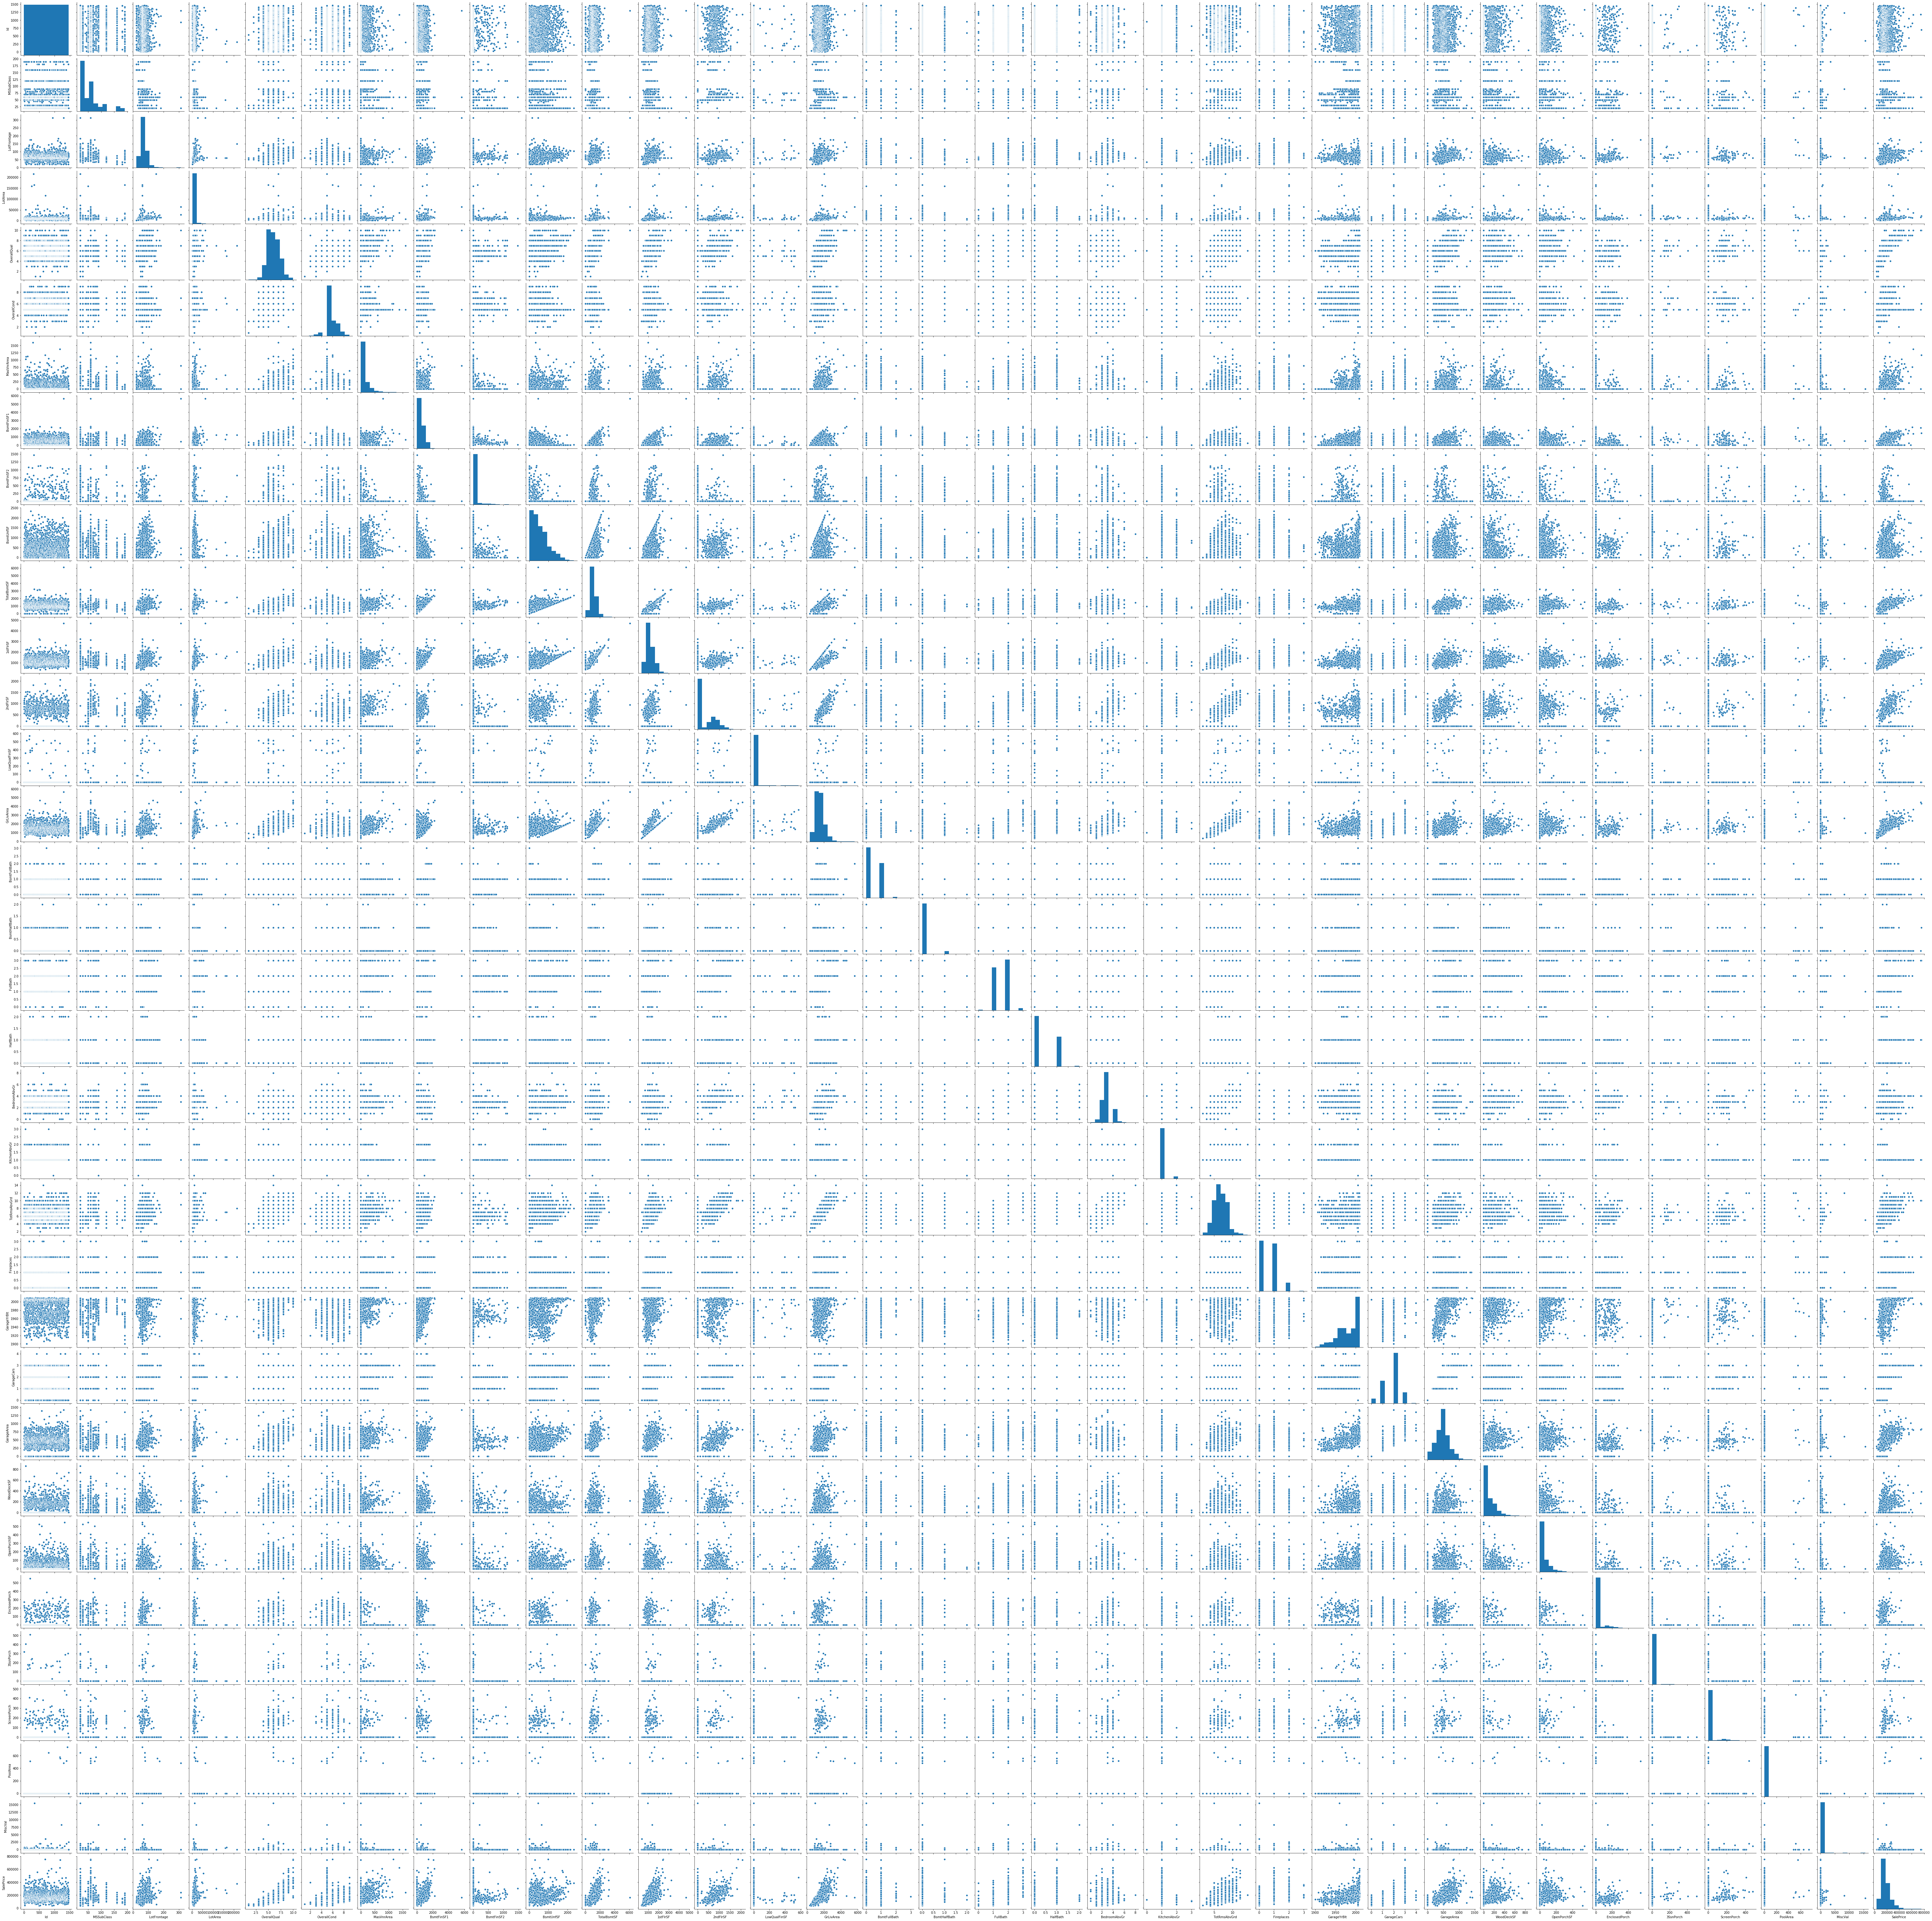

In [20]:
# Correlation Plot
import seaborn as sns

sns.pairplot(data=train[numeric_column])

In [22]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = features  #independent columns
y = target    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50)#.plot(kind='barh')
#plt.show()

C:\Users\sowri\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02018159 0.03544996 0.03997429 0.03005139 0.02311853 0.02895706
 0.03410986 0.01055884 0.04121523 0.03834061 0.04309012 0.02160774
 0.0017732  0.04189317 0.01822965 0.00588171 0.01196929 0.01137721
 0.02149648 0.0034467  0.03006587 0.01993613 0.03848949 0.01772008
 0.0412689  0.0306943  0.03363979 0.01064073 0.00271165 0.00805749
 0.00055521 0.00438858 0.01665588 0.0167207  0.01679379 0.0161098
 0.01131873 0.00482567 0.00463765 0.00899936 0.01092233 0.01515861
 0.01561483 0.01521598 0.01041112 0.00536784 0.00835742 0.00667905
 0.00525915 0.00090783 0.00013802 0.00082685 0.00394001 0.00228584
 0.00624887 0.00326302 0.00583576 0.00342137 0.00281371 0.00131932
 0.00380404 0.00487374 0.00088096 0.00283751 0.00146725 0.00271637
 0.00513149 0.00204649 0.00526817 0.00413744 0.00412171 0.0015049
 0.00255202 0.00099337 0.00696078 0.00162545 0.00198179 0.00143781
 0.00471938]


1stFlrSF         0.043090
GrLivArea        0.041893
GarageArea       0.041269
BsmtUnfSF        0.041215
LotArea          0.039974
GarageYrBlt      0.038489
TotalBsmtSF      0.038341
LotFrontage      0.035450
BsmtFinSF1       0.034110
OpenPorchSF      0.033640
WoodDeckSF       0.030694
TotRmsAbvGrd     0.030066
OverallQual      0.030051
MasVnrArea       0.028957
OverallCond      0.023119
2ndFlrSF         0.021608
BedroomAbvGr     0.021496
MSSubClass       0.020182
Fireplaces       0.019936
BsmtFullBath     0.018230
GarageCars       0.017720
ys_2008          0.016794
ys_2007          0.016721
ys_2006          0.016656
ys_2009          0.016110
ms_6             0.015615
ms_7             0.015216
ms_5             0.015159
FullBath         0.011969
HalfBath         0.011377
ys_2010          0.011319
ms_4             0.010922
EnclosedPorch    0.010641
BsmtFinSF2       0.010559
ms_8             0.010411
ms_3             0.008999
ms_10            0.008357
ScreenPorch      0.008057
bdg_1Fam    

## Train Model: Linear Regression

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


X = features  #independent columns
y = target   #target column: Sale Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [8]:
y_pred = lm.predict(X_test)
y_pred[0:5]

array([247794.43392512, 181255.91001053, 112231.71838907, 233601.14774885,
        99899.58163985])

In [21]:
# R^2 score
lm.score(X_test, y_test)

0.7555745453713775

In [23]:
X.head() # features used.

LotArea  GrLivArea  OverallQual  OverallCond  ys_2006  ys_2007  ys_2008  \
0  8450     1710       7            5            0        0        1         
1  9600     1262       6            8            0        1        0         
2  11250    1786       7            5            0        0        1         
3  9550     1717       7            5            1        0        0         
4  14260    2198       8            5            0        0        1         

   ys_2009  ys_2010  nbh_Blmngtn  nbh_Blueste  nbh_BrDale  nbh_BrkSide  \
0  0        0        0            0            0           0             
1  0        0        0            0            0           0             
2  0        0        0            0            0           0             
3  0        0        0            0            0           0             
4  0        0        0            0            0           0             

   nbh_ClearCr  nbh_CollgCr  nbh_Crawfor  nbh_Edwards  nbh_Gilbert  \
0  0            1            0            0            0             
1  0            0            0            0            0             
2  0            1            0            0            0             
3  0            0            1            0            0             
4  0            0            0            0            0             

   nbh_IDOTRR  nbh_MeadowV  nbh_Mitchel  nbh_NAmes  nbh_NPkVill  nbh_NWAmes  \
0  0           0            0            0          0            0            
1  0           0            0            0          0            0            
2  0           0            0            0          0            0            
3  0           0            0            0          0            0            
4  0           0            0            0          0            0            

   nbh_NoRidge  nbh_NridgHt  nbh_OldTown  nbh_SWISU  nbh_Sawyer  nbh_SawyerW  \
0  0            0            0            0          0           0             
1  0            0            0            0          0           0             
2  0            0            0            0          0           0             
3  0            0            0            0          0           0             
4  1            0            0            0          0           0             

   nbh_Somerst  nbh_StoneBr  nbh_Timber  nbh_Veenker  bdg_1Fam  bdg_2fmCon  \
0  0            0            0           0            1         0            
1  0            0            0           1            1         0            
2  0            0            0           0            1         0            
3  0            0            0           0            1         0            
4  0            0            0           0            1         0            

   bdg_Duplex  bdg_Twnhs  bdg_TwnhsE  
0  0           0          0           
1  0           0          0           
2  0           0          0           
3  0           0          0           
4  0           0          0

In [11]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7555745453713774

Challenge: what score do we use to compare different models?

## Train Model: XGBoost

In [28]:
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score#, balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

# Split test and train data set
X = features  #independent columns
y = target   #target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Fit model
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)


y_pred = my_model.predict(X_test)
#print("ROC AUC Score new: " + str(roc_auc_score(y_test, y_pred)))

#r2_score(y_test, y_pred)
mean_squared_log_error(y_test, y_pred)

C:\Users\sowri\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.019208323387204636

In [ ]:
# Old score: .86